Kd = 1.0916086065430586 +/- 0.9999162680371432
[1.09160861e+00 1.63257531e-22 2.16755064e+02 1.84376479e+00]
Kd = 0.0697593957413054 +/- 0.9979905076164084
[6.97593957e-02 3.71506917e-31 1.98333582e+02 2.05437441e+00]
Kd = 3.939378936520788e-11 +/- 0.99981708694347
[3.93937894e-11 9.63114929e-16 1.45712143e+02 2.42459197e+00]


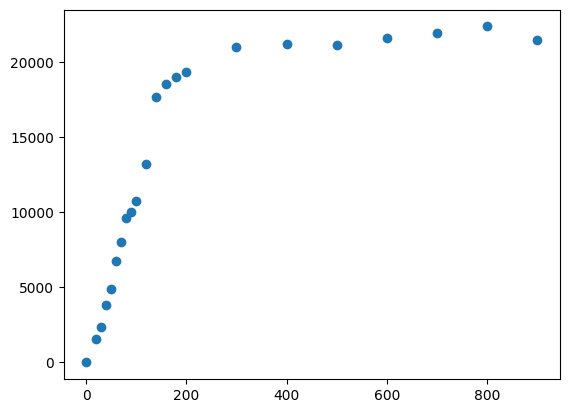

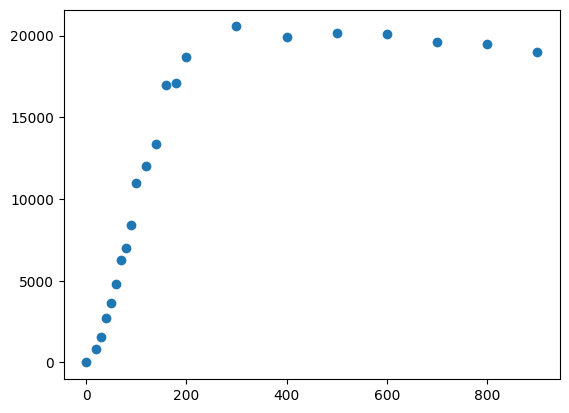

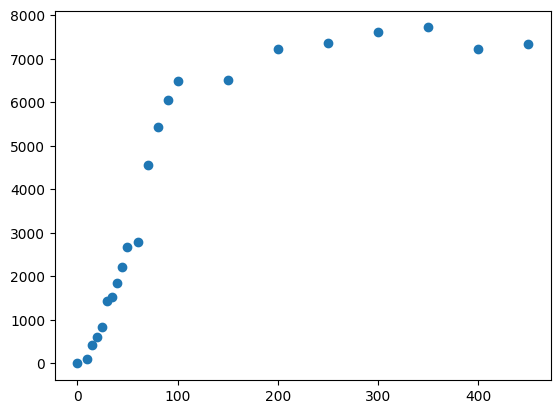

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import pandas as pd



def func_n(Pt, Kd, c, Eps, n, Lt=100): 
    return (1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n)))*Eps + c

def func_n50(Pt, Kd, c, Eps, n, Lt=50): 
    return (1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n)))*Eps + c


workdir = '/mnt/e/GitHub_Design/DesignScript/BindingKd/ruc_fluo_kd_data/'


data_2 = pd.read_table(workdir + '599_2nd.txt', header=None) 
data_3 = pd.read_table(workdir + '599_3rd.txt', header=None) 
data_4 = pd.read_table(workdir + '599_4th.txt', header=None)


Pt = data_2[0].values
ydata = data_2[5].values
popt, pcov = curve_fit(func_n, Pt, ydata, p0=[5, 0.1, 9000, 1], bounds=(0, [500, 1, 15000, 10]))
print("Kd =", popt[0], "+/-", pcov[0,0]**0.001)
print(popt)
fig,ax = plt.subplots()
ax.scatter(Pt, ydata)

Pt = data_3[0].values
ydata = data_3[5].values
popt, pcov = curve_fit(func_n, Pt, ydata, p0=[5, 0.1, 9000, 1], bounds=(0, [500, 1, 15000, 10]))
print("Kd =", popt[0], "+/-", pcov[0,0]**0.001)
print(popt)
fig,ax = plt.subplots()
ax.scatter(Pt, ydata)

Pt = data_4[0].values
ydata = data_4[5].values

popt, pcov = curve_fit(func_n50, Pt, ydata, p0=[5, 0.1, 9000, 1], bounds=(0, [500, 1, 15000, 10]))
print("Kd =", popt[0], "+/-", pcov[0,0]**0.001)
print(popt)
fig,ax = plt.subplots()
ax.scatter(Pt, ydata)





In [8]:

ydata = np.array((data_2[5].values, data_3[5].values))
popt, pcov = curve_fit(lambda Pt, Kd, c, Eps, n: np.tile(func_n(Pt, Kd, c, Eps, n), len(ydata)), Pt, ydata.ravel(), p0=[5, 1, 9000, 1], bounds=(0, [1000, 100, 15000, 5]))
print("Kd =", popt[0], "+/-", pcov[0,0]**0.001)
print(popt)


Kd = 1.4177252372699178e-10 +/- 1.002233959458191
[1.41772524e-10 2.12116904e-07 1.35596071e+02 1.07683827e+00]


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics

from scipy.optimize import least_squares, curve_fit


Pt100 = data_3[0]
Y100 = data_3[5]
Pt50 = data_4[0]
Y50 = data_4[5]

In [44]:
def pl_stoich(Pt, Lt, Kd, n):
    return 1/2*(Kd + Lt + Pt/n - np.sqrt((Kd + Lt + Pt/n)**2 - 4*Lt*Pt/n))

def res_float_ruc(x):
    rs = []
    rs.extend(Y100[i] - x[0]*pl_stoich(Pt100[i], 100, x[1], x[2])  - x[3] for i in range(len(Pt100)) )
    rs.extend(Y50[i] - x[0]*pl_stoich(Pt50[i], 50, x[1], x[2])  - x[4] for i in range(len(Pt50)) )
    return rs

In [45]:
#res_nir = least_squares(res_float_ruc, np.array([.002, 1, 1, .007,.007,.007]), bounds=[(0.0001,.1,.5, .0001,.0001,.0001), (.01,50,3, .1,.1,.1)])
res_ruc = least_squares(res_float_ruc, np.array([200, .1, 1, .007,.007,]), bounds=[(1,.01,.5, 0.001, 0.001), (20000,50,3, 1000, 1000)])

x = res_ruc.x  # fit parameters


print('Fit of full data from Science paper:')
print(
      'delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)=', x[0],
      '\nKd (uM)=', x[1],
      '\nN(stoichiometry)=', x[2]
      )

print(x)

Fit of full data from Science paper:
delta Epsilon of Apx @ 305 nm (M^-1 cm^-1)= 182.56047973769438 
Kd (uM)= 1.1222094995736935 
N(stoichiometry)= 2.1222907875769885
[1.82560480e+02 1.12220950e+00 2.12229079e+00 1.00000000e+03
 1.00000000e-03]


([<matplotlib.axis.XTick at 0x7f45a6af4040>,
 <a list of 5 Text major ticklabel objects>)

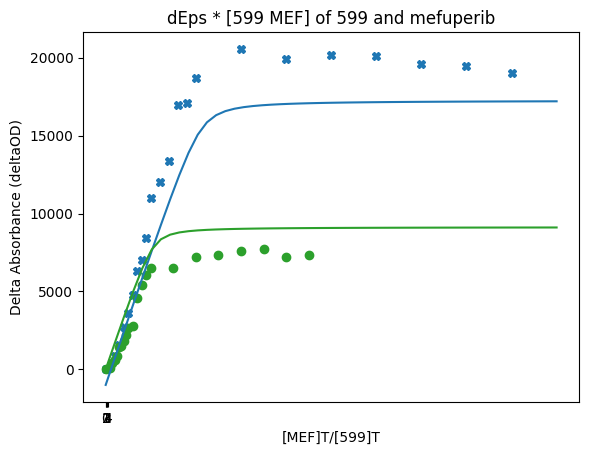

In [47]:
plt.figure()
plt.plot(Pt100, Y100, 'X', label='[ABLER]T = 100 nM', color='tab:blue')
plt.plot(Pt50, Y50, 'o', label='[ABLER]T = 50 nM', color='tab:green' )
#plt.errorbar(ratio_1, dePL_1, yerr= dePL_1_std, fmt='X', label='[ABLER]T = 1 uM', color='tab:blue')
#plt.errorbar(ratio_2, dePL_2, yerr= dePL_2_std, fmt='o', label='[ABLER]T = 2 uM', color='tab:green')

fit_dePL_1 = [x[0] * pl_stoich(np.linspace(0,1000,50)[i], 100, x[1], x[2]) - x[3] for i in range(50)]
fit_dePL_2 = [x[0] * pl_stoich(np.linspace(0,1000,50)[i], 50, x[1], x[2]) - x[4] for i in range(50)]


fit_1x = [c for c in np.linspace(0,1000,50)]
fit_2x = [c for c in np.linspace(0,1000,50)]
plt.plot(fit_1x, fit_dePL_1, color='tab:blue')
plt.plot(fit_2x, fit_dePL_2, color='tab:green')

plt.xlabel('[MEF]T/[599]T')
plt.ylabel('Delta Absorbance (deltaOD)')
plt.title('dEps * [599 MEF] of 599 and mefuperib')
plt.xticks(list(range(5)))